In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math
import sklearn.linear_model

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
#matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")


In [3]:
all_signatures = pandas.read_csv("../data/all_signatures.csv", index_col=0)
all_signatures.columns = [c.replace("[", "(").replace("]", ")") for c in all_signatures.columns]
all_signatures.index = [
    x.replace("-", " ").replace(":", " ").replace(".", " ").replace(";", " ").replace("  ", " ")
    for x in all_signatures.index
]
all_signatures

,A(C>A)A,A(C>A)C,A(C>A)G,A(C>A)T,A(C>G)A,A(C>G)C,A(C>G)G,A(C>G)T,A(C>T)A,A(C>T)C,A(C>T)G,A(C>T)T,A(T>A)A,A(T>A)C,A(T>A)G,A(T>A)T,A(T>C)A,A(T>C)C,A(T>C)G,A(T>C)T,A(T>G)A,A(T>G)C,A(T>G)G,A(T>G)T,C(C>A)A,C(C>A)C,C(C>A)G,C(C>A)T,C(C>G)A,C(C>G)C,C(C>G)G,C(C>G)T,C(C>T)A,C(C>T)C,C(C>T)G,C(C>T)T,C(T>A)A,C(T>A)C,C(T>A)G,C(T>A)T,C(T>C)A,C(T>C)C,C(T>C)G,C(T>C)T,C(T>G)A,C(T>G)C,C(T>G)G,C(T>G)T,G(C>A)A,G(C>A)C,G(C>A)G,G(C>A)T,G(C>G)A,G(C>G)C,G(C>G)G,G(C>G)T,G(C>T)A,G(C>T)C,G(C>T)G,G(C>T)T,G(T>A)A,G(T>A)C,G(T>A)G,G(T>A)T,G(T>C)A,G(T>C)C,G(T>C)G,G(T>C)T,G(T>G)A,G(T>G)C,G(T>G)G,G(T>G)T,T(C>A)A,T(C>A)C,T(C>A)G,T(C>A)T,T(C>G)A,T(C>G)C,T(C>G)G,T(C>G)T,T(C>T)A,T(C>T)C,T(C>T)G,T(C>T)T,T(T>A)A,T(T>A)C,T(T>A)G,T(T>A)T,T(T>C)A,T(T>C)C,T(T>C)G,T(T>C)T,T(T>G)A,T(T>G)C,T(T>G)G,T(T>G)T
Signature 1,0.011098,0.009149,1.490070e-03,0.006234,0.001801,0.002581,0.000593,0.002964,0.029515,0.014323,0.171647,0.012624,4.021520e-03,0.002371,0.002811,0.008361,0.013916,0.006275,0.010138,0.009256,0.001588,0.001784,0.001386,0.003159,0.006596,0.007342,0.000893,0.007187,0.001285,0.000702,0.000506,0.001382,0.020896,0.018502,0.095577,0.017113,0.001183,0.001903,0.001488,2.179344e-03,0.004177,0.005253,0.007013,6.713813e-03,0.000303,0.002099,0.001600,0.002759,0.008233,0.005758,0.000616,0.004459,0.000602,0.002393,2.485340e-07,0.000890,0.024944,0.027161,0.103571,0.017690,0.000689,0.000552,0.001200,0.002107,0.011248,0.007000,4.977593e-03,0.010667,0.000099,2.023656e-04,0.001188,0.000801,0.012250,0.011162,0.002275,0.015259,0.001875,0.002067,3.048970e-04,0.003152,0.014492,0.017681,0.076002,0.013762,0.005600,0.001999,0.001090,0.003981,0.008074,0.004857,0.008325,0.006257,1.397554e-03,0.001292,2.031077e-03,0.004030
Signature 2,0.000683,0.000619,9.927896e-05,0.000324,0.000263,0.000270,0.000219,0.000611,0.007442,0.002726,0.003322,0.003327,1.323770e-07,0.000113,0.000533,0.000149,0.001304,0.000426,0.000575,0.001488,0.000034,0.000025,0.000273,0.000218,0.000677,0.000214,0.000007,0.000416,0.000028,0.000280,0.000019,0.000313,0.015020,0.003517,0.004979,0.008957,0.000155,0.000464,0.000230,5.748856e-04,0.000547,0.000392,0.000362,5.609001e-04,0.000114,0.000022,0.000228,0.000067,0.000352,0.000134,0.000178,0.000123,0.000045,0.000015,4.066589e-05,0.000268,0.006391,0.001996,0.000303,0.003266,0.000115,0.000294,0.000089,0.000216,0.000005,0.000186,4.950440e-07,0.000579,0.000096,4.700238e-05,0.000110,0.000086,0.015127,0.006532,0.001656,0.012395,0.037242,0.000019,1.625465e-03,0.066880,0.419941,0.081972,0.047720,0.228675,0.000081,0.000005,0.000067,0.000276,0.000102,0.000470,0.000192,0.000585,7.173695e-05,0.000014,2.066152e-04,0.000024
Signature 3,0.022172,0.017872,2.138340e-03,0.016265,0.024003,0.012160,0.005275,0.023278,0.017872,0.008896,0.003573,0.014798,8.428564e-03,0.007373,0.007357,0.008754,0.013036,0.009186,0.011717,0.016979,0.002351,0.001464,0.009054,0.007031,0.018782,0.015760,0.001963,0.014723,0.016833,0.013531,0.004176,0.024046,0.014395,0.008545,0.003518,0.016076,0.007571,0.012725,0.011509,1.645618e-02,0.007895,0.014431,0.008423,1.193243e-02,0.001974,0.005824,0.010465,0.008724,0.009697,0.010843,0.000929,0.012215,0.011917,0.009824,1.671054e-03,0.017914,0.016127,0.008209,0.001213,0.010612,0.004435,0.005615,0.008070,0.008679,0.006850,0.006261,6.098763e-03,0.007509,0.004144,4.501985e-03,0.016391,0.007067,0.011653,0.016607,0.001357,0.016328,0.016041,0.020150,2.527911e-03,0.032674,0.008880,0.013530,0.001705,0.010304,0.007133,0.009103,0.006566,0.014712,0.009115,0.010954,0.006113,0.010774,5.427184e-03,0.006160,1.107653e-02,0.013001
Signature 4,0.036500,0.030900,1.830000e-02,0.024300,0.009700,0.005400,0.003100,0.005400,0.012000,0.007500,0.002800,0.005900,4.800000e-03,0.003900,0.010000,0.003000,0.008400,0.002000,0.008100,0.003600,0.000000,0.000200,0.001500,0.000200,0.046100,0.061400,0.008800,0.043200,0.010500,0.009700,0.006300,0.009400,0.021000,0.014400,0.007600,0.020100,0.007500,0.011100,0.034200,1.150000e-02,0.005200,0.002600,0.010000,5.400000e-03,0.000000,0.001300,0.004600,0.001200,0.037600,0.039900,0.022

In [4]:
deconvolution_df = pandas.read_csv("../data/deconstructsigs_output.cleaned.csv",
                                   index_col=["source_id", "kind"])
for col in deconvolution_df.columns:
    if col.endswith(".1"):
        deconvolution_df[col[:-2]] = deconvolution_df[col]
        del deconvolution_df[col]
deconvolution_df

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans xpf 1,treated,kind,source_id
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-166-1/SP102133,all,0.000000,0.000000,0.000000,0.000000,0.000000,0.063701,0.000000,0.250905,0.000000,0.514761,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.094825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,all,AOCS-166-1/SP102133
AOCS-092-13/SP101630,new,0.000000,0.000000,0.133002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.094217,0.120342,0.141969,0.000000,0.000000,0.000000,0.080833,0.152453,0.000000,0.000000,0.000000,0.145093,True,new,AOCS-092-13/SP101630
AOCS-119-13/SP101732,all,0.000000,0.000000,0.217817,0.000000,0.000000,0.000000,0.473673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.071525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,all,AOCS-119-13/SP101732
AOCS-117-13/SP101724,all,0.000000,0.000000,0.243353,0.000000,0.000000,0.000000,0.310672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067353,0.000000,0.000000,0.000000,0.000000,True,all,AOCS-117-13/SP101724
AOCS-135-13/SP101855,all,0.000000,0.000000,0.272220,0.000000,0.103954,0.000000,0.397365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,all,AOCS-135-13/SP101855
AOCS-135-14/SP101860,all,0.000000,0.000000,0.276793,0.000000,0.110276,0.000000,0.386780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,all,AOCS-135-14/SP101860
AOCS-150-13/SP102010,all,0.000000,0.000000,0.293942,0.000000,0.000000,0.000000,0.239073,0.000000,0.000000,0.000000,0.000000,0.000000,0.078714,0.00000,0.069938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074023,0.000000,0.000000,True,all,AOCS-150-13/SP102010
AOCS-004-1/SP101519,all,0.000000,0.000000,0.325053,0.000000,0.176914,0.000000,0.134828,0.000000,0.000000,0.000000,0.000000,0.000000,0.088918,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,all,AOCS-004-1/SP101519
AOCS-088-1/SP101610,all,0.000000,0.000000,0.331926,0.000000,0.000000,0.000000,0.437654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,all,AOCS-088-1/SP101610


In [5]:
deconvolved_signatures_all = deconvolution_df.ix[deconvolution_df.kind == "all"].copy()
del deconvolved_signatures_all["treated"]
del deconvolved_signatures_all["kind"]
del deconvolved_signatures_all["source_id"]
deconvolved_signatures_all.index = deconvolved_signatures_all.index.droplevel(1)
deconvolved_signatures_all.shape

(115, 26)

In [6]:
deconvolved_signatures_new = deconvolution_df.ix[deconvolution_df.kind == "new"]
del deconvolved_signatures_new["treated"]
del deconvolved_signatures_new["kind"]
del deconvolved_signatures_new["source_id"]

deconvolved_signatures_new.index = deconvolved_signatures_new.index.droplevel(1)
deconvolved_signatures_new.shape

(14, 26)

In [ ]:
deconvolved_signatures_new

In [7]:
mutations = pandas.read_csv("../data/mutations.csv.bz2")
mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [8]:
treatments_matrix = pandas.read_csv("../data/treatments_matrix.csv", index_col=0)
treatments_matrix

,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,farletuzumab/placebo,nab-paclitaxel,etoposide
source_id,,,,,,,,,,,,,
AOCS-001-1/SP101515,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-002-1/SP101517,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-004-1/SP101519,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-005-1/SP101521,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-13/SP101524,True,True,True,True,False,True,False,False,False,False,False,False,False
AOCS-034-1/SP101523,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-055-1/SP101526,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-056-1/SP101528,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-057-1/SP101530,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Compute residual signatures.
to_run = [
    ("all", deconvolved_signatures_all, mutations),
    ("new", deconvolved_signatures_new, mutations.ix[mutations.unique_to_treated]),
]
residuals = collections.defaultdict(lambda: collections.defaultdict(dict))
residual_participations = collections.defaultdict(dict)
for (kind, deconvolved_signatures, some_mutations) in to_run:
    some_mutations = some_mutations.ix[
        some_mutations.snv & some_mutations.source_id.isin(deconvolved_signatures.index)
    ]
    counts = some_mutations.groupby(["source_id", "context_mutation_3p5p"]).contig.count().unstack()
    totals = counts.sum(1)
    accounted_for_counts_by_signature = (totals * deconvolved_signatures.T).T
    accounted_for_counts_by_context = accounted_for_counts_by_signature.dot(
        all_signatures.ix[accounted_for_counts_by_signature.columns])
    unaccounted_for_counts = (counts - accounted_for_counts_by_context).applymap(lambda x: max(0, x))
    unaccounted_for_density = (unaccounted_for_counts.T / unaccounted_for_counts.sum(1)).T
    residuals["count"][kind] = unaccounted_for_counts
    residuals["density"][kind] = unaccounted_for_density
    
    residual_participations[kind] = 1 - deconvolved_signatures.sum(1)


residuals = pandas.Panel4D(residuals)
residuals

residuals_concat1 = residuals["density"]["new"].dropna().copy()
residuals_concat1["source_id"] = residuals_concat1.index
residuals_concat1["kind"] = "new"
residuals_concat2 = residuals["density"]["all"].dropna().copy()
residuals_concat2["source_id"] = residuals_concat2.index
residuals_concat2["kind"] = "all"
residuals_concat = pandas.concat([residuals_concat1, residuals_concat2], ignore_index=True)
residuals_concat["treated"] = [
    sources.ix[row.source_id].treated
    for (i, row) in residuals_concat.iterrows()
]

residuals_concat.index = [
     row.kind[0] + str(row.treated)[0] + row.source_id.replace("AOCS-", "").split("/")[0]
    for (i, row) in residuals_concat.iterrows()
]
residuals_concat_treated = residuals_concat.treated
residuals_source_id = residuals_concat.source_id

del residuals_concat["treated"]
del residuals_concat["source_id"]
del residuals_concat["kind"]
residuals_concat

subselection = residuals_concat_treated

#X = residuals_concat.ix[subselection]
#y = treatments_matrix.ix[residuals_source_id[subselection]].cyclophosphamide

X = residuals_concat
y = residuals_concat_treated


model = sklearn.linear_model.LogisticRegressionCV()
score = sklearn.cross_validation.cross_val_score(model, X, y, scoring='roc_auc')
print(score)
model.fit(X, y)
coef = pandas.Series(model.coef_[0], index=residuals_concat.columns).sort(inplace=False, ascending=False)
print(coef.head())

result = pandas.DataFrame({'rate': residuals_concat["G(C>T)C"],
                  'cyc': [treatments_matrix.cyclophosphamide[x] for x in residuals_source_id],
                  'treated': [sources.treated[x] for x in residuals_source_id],
                 }).sort('rate', ascending=False)
result.groupby("cyc").rate.mean()

import sklearn.cluster
clustering = sklearn.cluster.AgglomerativeClustering(linkage="average", n_clusters=5, affinity='cosine')
clustering_result = pandas.Series(clustering.fit_predict(residuals_concat), index=residuals_concat.index)
clustering

for value in sorted(clustering_result.unique()):
    print("%s\n" % " ".join(clustering_result[clustering_result == value].index))

[ 0.96949891  0.84722222  0.88461538]
context_mutation_3p5p
C(C>T)T    45.411098
C(C>T)C    41.291520
G(C>A)C    31.737629
G(C>G)T    28.760278
G(T>C)C    28.519066
dtype: float64
nT034-13 nT064-13 nT086-13 nT092-13 nT095-13 nT137-13 aT064-13

nT065-13 nT088-13 nT091-13 nT093-13 nT094-2 nT139-16 nT139-17 nT139-4 aF001-1 aF002-1 aF004-1 aF005-1 aT034-13 aF055-1 aF056-1 aF057-1 aF058-1 aF059-1 aF060-1 aF061-1 aF063-1 aF064-1 aF075-1 aF076-1 aT077-1 aF078-1 aF079-1 aF080-1 aF081-1 aF083-1 aF084-1 aF085-1 aT086-13 aF088-1 aT088-13 aF090-1 aT091-13 aT092-13 aF094-1 aT094-2 aT095-13 aF096-1 aF097-1 aF104-1 aF105-1 aT106-1 aF107-1 aF108-1 aF109-1 aF111-1 aF112-1 aF113-1 aF114-1 aF115-1 aF116-1 aT117-13 aT119-13 aT120-13 aF122-1 aF123-1 aF124-1 aF125-1 aF126-1 aF128-1 aF130-1 aF131-1 aF132-1 aF133-1 aT134-13 aT135-13 aT135-14 aF137-12 aT137-13 aT138-13 aT139-16 aT139-4 aT141-13 aT141-14 aT142-13 aF143-1 aF144-1 aF145-1 aF146-1 aF147-1 aF148-1 aF149-1 aT150-13 aT150-14 aF152-1 aF153-1 aT155-13 

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/core/index.py:4072: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


In [10]:
residual_participations

defaultdict(dict, {'all': source_id
             AOCS-166-1/SP102133     0.075808
             AOCS-119-13/SP101732    0.236985
             AOCS-117-13/SP101724    0.378622
             AOCS-135-13/SP101855    0.226461
             AOCS-135-14/SP101860    0.226150
             AOCS-150-13/SP102010    0.244310
             AOCS-004-1/SP101519     0.274287
             AOCS-088-1/SP101610     0.230420
             AOCS-092-13/SP101630    0.347831
             AOCS-125-1/SP101775     0.354621
             AOCS-088-13/SP101612    0.273676
             AOCS-095-13/SP101650    0.318118
             AOCS-107-1/SP101674     0.423918
             AOCS-128-1/SP101795     0.235493
             AOCS-122-1/SP101748     0.216822
             AOCS-148-1/SP101990     0.297634
             AOCS-064-1/SP101552     0.194164
             AOCS-155-13/SP102045    0.364319
             AOCS-150-14/SP102015    0.389103
             AOCS-158-1/SP102064     0.264523
             AOCS-131-1/SP101815     0.27753

In [26]:
pandas.Series([1,3,4]).tolist()


[1, 3, 4]

In [28]:
residual_participations

defaultdict(dict, {'all': source_id
             AOCS-166-1/SP102133     0.075808
             AOCS-119-13/SP101732    0.236985
             AOCS-117-13/SP101724    0.378622
             AOCS-135-13/SP101855    0.226461
             AOCS-135-14/SP101860    0.226150
             AOCS-150-13/SP102010    0.244310
             AOCS-004-1/SP101519     0.274287
             AOCS-088-1/SP101610     0.230420
             AOCS-092-13/SP101630    0.347831
             AOCS-125-1/SP101775     0.354621
             AOCS-088-13/SP101612    0.273676
             AOCS-095-13/SP101650    0.318118
             AOCS-107-1/SP101674     0.423918
             AOCS-128-1/SP101795     0.235493
             AOCS-122-1/SP101748     0.216822
             AOCS-148-1/SP101990     0.297634
             AOCS-064-1/SP101552     0.194164
             AOCS-155-13/SP102045    0.364319
             AOCS-150-14/SP102015    0.389103
             AOCS-158-1/SP102064     0.264523
             AOCS-131-1/SP101815     0.27753

In [27]:
residuals

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 2 (labels) x 2 (items) x 115 (major_axis) x 96 (minor_axis)
Labels axis: count to density
Items axis: all to new
Major_axis axis: AOCS-001-1/SP101515 to AOCS-171-12/SP102192
Minor_axis axis: A(C>A)A to T(T>G)T

In [30]:
all_mutations_with_signatures_primary_and_new = mutations.ix[mutations.snv].copy().reset_index()

# If a mutation is unique to treated, we use the "new" signatures, otherwise we use the full sample signatures.
extra_columns = []

for (i, row) in all_mutations_with_signatures_primary_and_new.iterrows():
    if i % 10000 == 0:
        print("%d / %d" % (i, len(all_mutations_with_signatures_primary_and_new)))
    if row.unique_to_treated and row.source_id in deconvolved_signatures_new.index:
        signature_participations = deconvolved_signatures_new.ix[row.source_id]
        kind = 'new'
    else:
        signature_participations = deconvolved_signatures_all.ix[row.source_id]
        kind = 'all'
    
    unnormalized = (
        all_signatures.ix[signature_participations.index, row.context_mutation_3p5p]
        * signature_participations).tolist()

    # Add sample-specific "residual" signature.
    unnormalized.append(
        residuals.density.ix[kind, row.source_id, row.context_mutation_3p5p]
        * residual_participations[kind][row.source_id])
    
    unnormalized = numpy.array(unnormalized)
    normalized = unnormalized / unnormalized.sum()
    extra_columns.append(normalized)


new_df = pandas.DataFrame(
    extra_columns,
    columns=list(signature_participations.index) + ["residual"])
for col in new_df.columns:
    all_mutations_with_signatures_primary_and_new[col] = new_df[col]

all_mutations_with_signatures_primary_and_new


0 / 1113661
10000 / 1113661
20000 / 1113661
30000 / 1113661
40000 / 1113661
50000 / 1113661
60000 / 1113661
70000 / 1113661
80000 / 1113661
90000 / 1113661
100000 / 1113661
110000 / 1113661
120000 / 1113661
130000 / 1113661
140000 / 1113661
150000 / 1113661
160000 / 1113661
170000 / 1113661
180000 / 1113661
190000 / 1113661
200000 / 1113661
210000 / 1113661
220000 / 1113661
230000 / 1113661
240000 / 1113661
250000 / 1113661
260000 / 1113661
270000 / 1113661
280000 / 1113661
290000 / 1113661
300000 / 1113661
310000 / 1113661
320000 / 1113661
330000 / 1113661
340000 / 1113661
350000 / 1113661
360000 / 1113661
370000 / 1113661
380000 / 1113661
390000 / 1113661
400000 / 1113661
410000 / 1113661
420000 / 1113661
430000 / 1113661
440000 / 1113661
450000 / 1113661
460000 / 1113661
470000 / 1113661
480000 / 1113661
490000 / 1113661
500000 / 1113661
510000 / 1113661
520000 / 1113661
530000 / 1113661
540000 / 1113661
550000 / 1113661
560000 / 1113661
570000 / 1113661
580000 / 1113661
590000 / 11

AttributeError: 'Series' object has no attribute 'columns'

In [33]:
new_df = pandas.DataFrame(
    extra_columns,
    columns=list(signature_participations.index) + ["residual"])
for col in new_df.columns:
    all_mutations_with_signatures_primary_and_new[col] = new_df[col]

all_mutations_with_signatures_primary_and_new

,index,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans xpf 1,residual
0,0,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,61407797,61407798,C,T,intergenic,None,CCCCTCATCTCCCAG,CTGAACCACGTCCTT,C>T,0,47,47,NaN,NaN,NaN,0.000000,False,True,18:61407797 C>T,18:61407797,0.166667,0.500000,0.233333,0.100000,0.600000,True,G(C>T),(C>T)C,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.280834,0,0.000000,0,0.021558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0.697609
1,1,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,61407797,61407798,C,T,intergenic,None,CCCCTCATCTCCCAG,CTGAACCACGTCCTT,C>T,5,19,24,NaN,NaN,NaN,0.208332,True,True,18:61407797 C>T,18:61407797,0.166667,0.500000,0.233333,0.100000,0.600000,True,G(C>T),(C>T)C,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.287564,0,0.000000,0,0.020526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0.691910
2,2,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,6,63262672,63262673,C,A,intergenic,None,GACCACACAGGAACC,GAGAATTTACATGCA,C>A,0,69,69,NaN,NaN,NaN,0.000000,False,True,6:63262672 C>A,6:63262672,0.400000,0.266667,0.133333,0.200000,0.466667,True,C(C>A),(C>A)G,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.289878,0,0.000000,0,0.066731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0.643391
3,3,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,6,63262672,63262673,C,A,intergenic,None,GACCACACAGGAACC,GAGAATTTACATGCA,C>A,9,40,49,NaN,NaN,NaN,0.183673,True,True,6:63262672 C>A,6:63262672,0.400000,0.266667,0.133333,0.200000,0.466667,True,C(C>A),(C>A)G,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.294160,0,0.000000,0,0.062968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0.642873
4,4,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,63487173,63487174,C,G,intronic,CDH7,TGTTCCTTTGCTTCC,TAAAGTGCGAAAGAT,C>G,0,31,31,NaN,NaN,NaN,0.000000,False,True,18:63487173 C>G,18:63487173,0.233333,0.200000,0.366667,0.200000,0.400000,True,C(C>G),(C>G)T,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.886031,0,0.000000,0,0.112093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0.001876
5,5,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,63487173,63487174,C,G,intronic,CDH7,TGTTCCTTTGCTTCC,TAAAGTGCGAAAGAT,C>G,6,17,23,NaN,NaN,NaN,0.260868,True,True,18:63487173 C>G,18:63487173,0.233333,0.200000,0.366667,0.200000,0.400000,True,C(C>G),(C>G)T,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.894744,0,0.000000,0,0.105256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0.000000
6,6,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68110672,68110673,A,T,intergenic,None,TCCTTGTCGTCTCGT,TCTAGCCTGCAAACC,T>A,5,27,32,NaN,NaN,NaN,0.156250,True,True,18:68110672 A>T,18:68110672,0.133333,0.366667,0.333333,0.166667,0.533333,True,T(T>A),(T>A)T,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,{},0,False,0.000000,0,0.396704,0,0.000000,0,0.290

In [36]:
all_mutations_with_signatures_primary_and_new["Cisplatin Gallus gallus"].sum()

918.49486847331173

In [ ]:
'''
all_mutations_with_signatures = mutations.ix[mutations.snv]
new_mutations_with_signatures = mutations.ix[
    mutations.snv & mutations.source_id.isin(deconvolved_signatures_new.index) & mutations.unique_to_treated
]

def add_signature_columns(kind, mutations_df, signature_participations, all_signatures):
    mutations_df = mutations_df.copy().reset_index()
    extra_columns = []
    for (i, row) in mutations_df.iterrows():
        unnormalized = [
            all_signatures.ix[signature][row.context_mutation_3p5p] * participation
            for (signature, participation) in signature_participations.ix[row.source_id].iteritems()
        ]
        # Add sample-specific "residual" signature.
        unnormalized.append(
            residuals.density.ix[kind, row.source_id, row.context_mutation_3p5p] * residual_participations[kind][row.source_id])
        
        unnormalized = numpy.array(unnormalized)
        if numpy.isnan(unnormalized).any():
            print(i, row, unnormalized, signature, row.context_mutation_3p5, participation)
            raise ValueError()
        normalized = unnormalized / unnormalized.sum()
        extra_columns.append(normalized)
    new_df = pandas.DataFrame(extra_columns, columns=list(signature_participations.columns) + ["residual"])
    for col in new_df.columns:
        mutations_df[col] = new_df[col]
    return mutations_df

all_mutations_with_signatures = add_signature_columns(
    "all", all_mutations_with_signatures, deconvolved_signatures_all, all_signatures)
all_mutations_with_signatures

new_mutations_with_signatures = add_signature_columns(
    "new", new_mutations_with_signatures, deconvolved_signatures_new, all_signatures)
new_mutations_with_signatures
'''

In [ ]:
'''
mutations_with_signatures = pandas.concat([
        primary_mutations_with_signatures.ix[sources.index[~sources.treated]],
        new_mutations_with_signatures,
], ignore_index=True)
print(mutations_with_signatures.shape)
mutations_with_signatures.to_csv("../data/mutations_with_signatures.csv")
mutations_with_signatures
'''

In [37]:
muts_confident = mutations.ix[
    (mutations.called == 1) | (mutations.dna_alt_reads > 10)
]
muts_confident_coding = muts_confident.ix[muts_confident.effect.str.startswith("p.")]
muts_confident_coding_expressed = muts_confident_coding.ix[muts_confident_coding.rna_alt_reads > 2]

non_exon_effects = [
    "intergenic",
    "intragenic",
    "intronic",
    "non-coding-transcript",
    "incomplete",
    "splice-acceptor",
    "splice-donor",
    "intronic-splice-site",
    "exonic-splice-site",
    "3' UTR",
    "5' UTR",
]

muts_confident_exon = muts_confident.ix[~ muts_confident.effect.isin(non_exon_effects)]
muts_exon = mutations.ix[~ mutations.effect.isin(non_exon_effects)]

[x for x in muts_confident_exon.effect.unique().tolist() if not x.startswith("p.")]


['silent']

In [39]:
use_signatures = [
    "Cisplatin Gallus gallus",
    'Cyclophosphamide Gallus gallus',
    'Cisplatin C Elegans fcd 2',
    'Cisplatin C Elegans polq 1',
    'Cisplatin C Elegans xpf 1',
    "Signature 1",
    "Signature 3",
    "Signature 8",
    "residual"
]

sources_with_signature_counts = sources.copy()
for source_id in sources.index:
    sub_all_muts = mutations.ix[(mutations.source_id == source_id)]
    sub_exon_muts = muts_exon.ix[(mutations.source_id == source_id)]
    grouped = all_mutations_with_signatures_primary_and_new.ix[
        all_mutations_with_signatures_primary_and_new.source_id == source_id
    ]

    num_mutations = float(sub_all_muts.shape[0])
    num_exon_mutations = float(sub_exon_muts.shape[0])
    num_neoantigens = float(sub_all_muts.num_binders.sum())
    
    snv_mutations_accounted_for = 0.0
    snv_neoantigens_accounted_for = 0.0
    for sig in use_signatures:
        snv_mutations_accounted_for += grouped[sig].sum()
        snv_neoantigens_accounted_for += numpy.dot(grouped[sig], grouped.num_binders)
        
        sources_with_signature_counts.loc[source_id, "%s mutations" % sig] = grouped[sig].sum() / num_mutations
        sources_with_signature_counts.loc[source_id, "%s neoantigens" % sig] = (
            numpy.dot(grouped[sig], grouped.num_binders)) / num_neoantigens
    
    snv_mutations = sub_all_muts.snv.sum()
    snv_neoantigens = sub_all_muts.ix[sub_all_muts.snv].num_binders.sum()
    
    sources_with_signature_counts.loc[source_id, "other snv mutations"] = (
        snv_mutations - snv_mutations_accounted_for) / num_mutations
    sources_with_signature_counts.loc[source_id, "other snv neoantigens"] = (
        snv_neoantigens - snv_neoantigens_accounted_for) / num_neoantigens

    sources_with_signature_counts.loc[source_id, "snv mutations"] = snv_mutations
    sources_with_signature_counts.loc[source_id, "snv neoantigens"] = snv_neoantigens
    
    sources_with_signature_counts.loc[source_id, "mnv mutations"] = (
        (~ sub_all_muts.indel) & (~ sub_all_muts.snv)).sum() / num_mutations
    sources_with_signature_counts.loc[source_id, "mnv neoantigens"] = (
        sub_all_muts.ix[(~ sub_all_muts.indel) & (~ sub_all_muts.snv)].num_binders.sum()) / num_neoantigens
    
    sources_with_signature_counts.loc[source_id, "indel mutations"] = (
        (sub_all_muts.indel).sum()) / num_exon_mutations
    sources_with_signature_counts.loc[source_id, "indel neoantigens"] = (
        sub_all_muts.ix[sub_all_muts.indel].num_binders.sum()) / num_neoantigens
    
sources_with_signature_counts
    

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,Cisplatin Gallus gallus mutations,Cisplatin Gallus gallus neoantigens,Cyclophosphamide Gallus gallus mutations,Cyclophosphamide Gallus gallus neoantigens,Cisplatin C Elegans fcd 2 mutations,Cisplatin C Elegans fcd 2 neoantigens,Cisplatin C Elegans polq 1 mutations,Cisplatin C Elegans polq 1 neoantigens,Cisplatin C Elegans xpf 1 mutations,Cisplatin C Elegans xpf 1 neoantigens,Signature 1 mutations,Signature 1 neoantigens,Signature 3 mutations,Signature 3 neoantigens,Signature 8 mutations,Signature 8 neoantigens,residual mutations,residual neoantigens,other snv mutations,other snv neoantigens,snv mutations,snv neoantigens,mnv mutations,mnv neoantigens,indel mutations,indel neoantigens
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078844,0.078574,0.415155,0.402228,0.160789,0.121722,0.204866,0.142451,1.302391e-01,1.144001e-01,5877,110,0.009938,0.015625,0.014286,0.125000
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210838,0.202316,0.000000,0.000000,0.237235,0.281652,0.194146,0.136300,3.538659e-01,3.797323e-01,1526,32,0.003916,0.000000,0.000000,0.000000
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318826,0.225754,0.132386,0.105507,0.276503,0.283097,2.634426e-01,2.132286e-01,6726,48,0.008694,0.155172,0.014706,0.017241
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136177,0.183839,0.179305,0.209324,0.110548,0.090461,0.195329,0.169103,3.732053e-01,3.472716e-01,5672,61,0.005085,0.000000,0.033333,0.000000
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413117,0.391516,0.045971,0.017465,0.310386,0.234362,2.196892e-01,3.233232e-01,13691,261,0.010476,0.003704,0.031056,0.029630
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090557,0.080830,0.603586,0.584041,0.000000,0.000000,0.211293,0.179138,8.591742e-02,7.363890e-02,7338,156,0.007971,0.005882,0.048544,0.076471
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099930,0.155162,0.289971,0.209788,0.000000,0.000000,0.147572,0.097935,4.582924e-01,4.247552e-01,15048,158,0.004235,0.112360,0.000000,0.000000
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106992,0.097508,0.480642,0.278791,0.232385,0.122927,0.173081,0.094107,0.000000e+00,0.000000e+00,7053,89,0.006759,0.406667,0.013333,0.000000
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070535,0.061568,0.355477,0.255674,0.206070,0.124202,0.167643,0.124539,1.889857e-01,1.840167e-01,6131,117,0.010482,0.057692,0.078125,0.192308


('mutations', 'pre-treatment', 104.88831890439161, array([  0.48635946,  11.6776803 ,  32.44023433,  18.5475204 ,
        17.94965765,  18.06015529,   0.78419078,   4.94252068]))
('mutations', 'post-treatment', 104.6202751358999, array([  3.48759857,   4.43116435,  38.05296536,  17.44748198,
        10.13398054,  25.2295468 ,   1.16748946,   4.67004808]))
('neoantigens', 'pre-treatment', 99.999999999999986, array([  0.37878289,  14.58576702,  26.19766395,  13.07966104,
        13.36650029,  15.14018247,   7.11203647,  10.13940588]))
('neoantigens', 'post-treatment', 100.0, array([  2.75264516,   5.36500515,  31.76396886,  13.15450231,
         7.94107628,  22.70118179,   8.32289336,   7.99872709]))


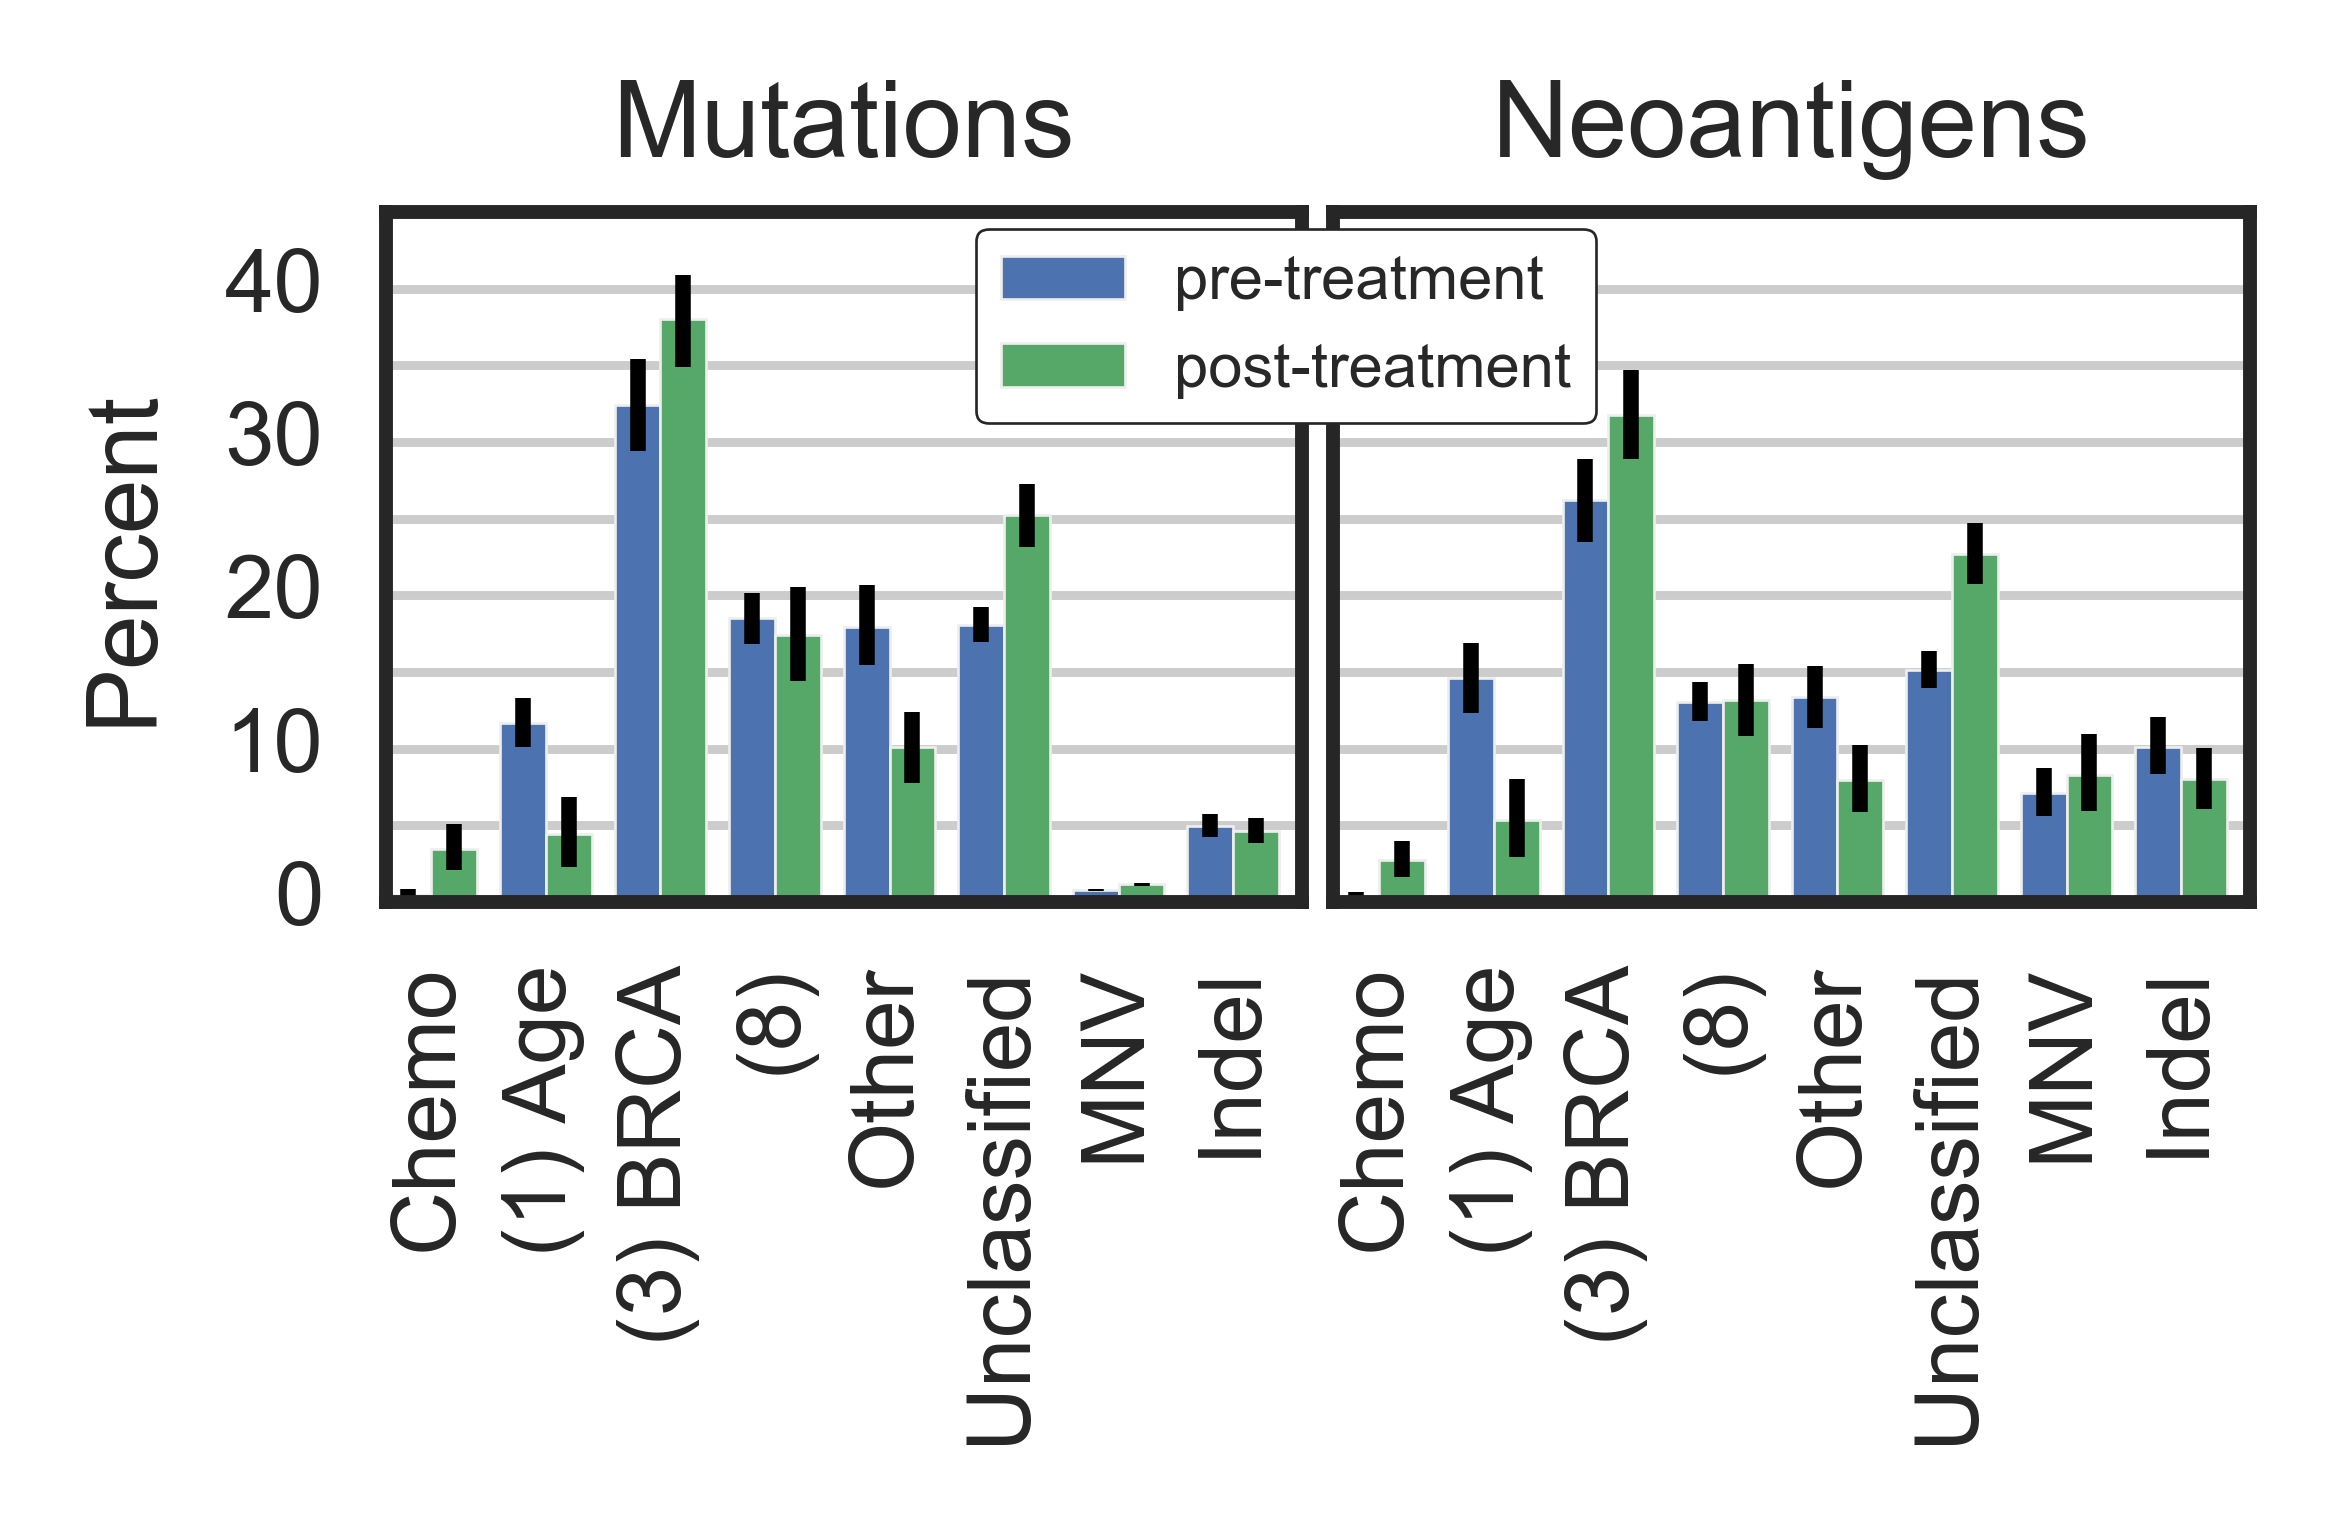

In [96]:
for key in ['mutations', 'neoantigens']:
    sources_with_signature_counts["chemo %s" % key] = (
        sources_with_signature_counts["Cisplatin Gallus gallus %s" % key]
        + sources_with_signature_counts['Cyclophosphamide Gallus gallus %s' % key]
        + sources_with_signature_counts['Cisplatin C Elegans fcd 2 %s' % key]
        + sources_with_signature_counts['Cisplatin C Elegans polq 1 %s' % key]
        + sources_with_signature_counts['Cisplatin C Elegans xpf 1 %s' % key]
    )

display_signatures = [
    "chemo",
    "Signature 1",
    "Signature 3",
    "Signature 8",
    "other snv",
    "residual",
    "mnv",
    "indel",
]

import itertools

def cleanup_name(col):
    return (
        col
        .replace("mnv", "MNV")
        .replace("mutations", "")
        .replace("neoantigens", "")
        .replace("other snv", "Other")
        .replace("indel", "Indel")
        .replace("residual", "Unclassified")
        .replace("chemo", "Chemo")
        .replace("Signature 1", "(1) Age")
        .replace("Signature 3", "(3) BRCA")
        .replace("Signature 8", "(8)")
        .strip())


def plot_mutations_or_neoantigens(which):
    palette = itertools.cycle(seaborn.color_palette())
    cols = [x + " " + which for x in display_signatures]
    masks = [
        ("pre-treatment", (~ sources_with_signature_counts.treated)),
        ("post-treatment", (sources_with_signature_counts.treated)),
    ]
    offset = 0
    for (label, mask) in masks:
        label_sources = sources_with_signature_counts.ix[mask]
        xs = numpy.arange(len(cols)) * 2.5 + offset
        ys = numpy.array([label_sources[col].mean() for col in cols]) * 100.0
        print(which, label, ys.sum(), ys)
        ranges = numpy.array([bootstrap(label_sources[col]) for col in cols]).T * 100.0
        error_low = ys - ranges[0]
        error_hi = ranges[1] - ys
        pyplot.bar(
            xs,
            ys,
            yerr=numpy.array([error_low, error_hi]),
            ecolor="black",
            label=label,
            color=next(palette),
            width=1.0)
        offset += 1
        
    pyplot.xticks(xs - 0.05, [cleanup_name(c) for c in cols], rotation=90)


pyplot.figure(figsize=(3,2))
seaborn.set_context("paper")
seaborn.set_style('white')

pyplot.subplot(121)
plot_mutations_or_neoantigens("mutations")
pyplot.title("Mutations")
pyplot.ylabel("Percent")
pyplot.gca().yaxis.grid(True)

for label in pyplot.gca().yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

pyplot.subplot(122, sharey=pyplot.gca())
plot_mutations_or_neoantigens("neoantigens")
pyplot.title("Neoantigens")
pyplot.gca().yaxis.grid(True)
pyplot.gca().label_outer()
pyplot.tight_layout(w_pad=0.25)

legend = pyplot.legend(ncol=1, fancybox=True, frameon=True, fontsize='xx-small', framealpha=1, bbox_to_anchor=(.32, 1.02))
legend.get_frame().set_facecolor('white')
legend.set_zorder(200)

pyplot.savefig("../figures/sources_of_mutations_and_neoantigens.pdf")


In [ ]:
'''
display_signatures = ["Signature 1", "Signature 3", "Signature 4"]
def calculate(sub_df):
    categories = [
#        ("Indel", sub_df.indel.astype(int)),
#        ("MNV", ((~sub_df.indel) & (~sub_df.snv)).astype(int)),
    ]
    for sig in display_signatures:
        categories.append((sig, sub_df[sig]))
    categories.append(
        ("Other SNV", sub_df[[c for c in sub_df.columns if "Signature" in c and c not in display_signatures]].sum(1)))
    columns = collections.defaultdict(list)
    for (name, category) in categories:
        print(name)
        columns["%s mutations" % name].append(category.sum())
        columns["%s neoantigens" % name].append(numpy.dot(category, sub_df.num_binders))
    return pandas.DataFrame(columns)
    
calculate(mutations_with_signatures_exon[mutations_with_signatures_exon.unique_to_treated])



def calculate(sub_df):
    #print(sub_df)
    group_sum = sub_df.groupby(["snv", "indel"]).num_binders.sum()
    group_count = sub_df.groupby(["snv", "indel"]).num_binders.count()
    df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
    df["peptide fraction"] = df["sum"] / df["sum"].sum()
    df["mut fraction"] = df["count"] / df["count"].sum()
    return df

def bootstrap_mean_df(full_df, calculate_function, stratify_column, samples=5000):
    col_values = full_df[stratify_column].unique()
    dfs = pandas.Panel(
        dict((i, calculate_function(full_df.ix[full_df[stratify_column].isin(sklearn.utils.resample(col_values))]))
             for i in range(samples)))
    num_removed = 0
    for i in dfs.items:
        if pandas.isnull(dfs.ix[i]).any().any():
            del dfs[i]
            num_removed += 1
    print("Removed %d nan entires" % num_removed)
        
    #dfs = pandas.Panel(dict((i, calculate_function(df)) for (i, df) in full_df.groupby(stratify_column)))
    #return dfs
    #print(dfs)
    #means = calculate_function(full_df)
    df_mean = dfs.mean(0)
    df_low = pandas.DataFrame(numpy.percentile(dfs, 5, axis=0), index=df_mean.index, columns=df_mean.columns)
    df_hi = pandas.DataFrame(numpy.percentile(dfs, 95, axis=0), index=df_mean.index, columns=df_mean.columns)
    df_combined = pandas.DataFrame(
        dict([(col, [
                        "%0.2f (%0.2f-%0.2f)" % (df_mean[col][i], df_low[col][i], df_hi[col][i])
                        for i in df_mean.index
                    ])
            for col in df_mean.columns]),
        index=df_mean.index)

    return (df_combined, df_mean, df_low, df_hi)

    for col in df_mean.columns:
        #cis = [(i, bootstrap(row)) for (i, row) in dfs[:,:,col].T.iterrows()]
        #cis = [(i, (min(row), (max(row)))) for (i, row) in dfs[:,:,col].T.iterrows()]
        means["%s_low" % col] = pandas.Series([x[1][0] for x in cis], index=[x[0] for x in cis])
        means["%s_high" % col] = pandas.Series([x[1][1] for x in cis], index=[x[0] for x in cis])
        means["%s_string" % col] = pandas.Series(
            ["%0.2f (%0.2f-%0.2f)" % ((means[col][x[0]],) + x[1]) for x in cis], index=[x[0] for x in cis])
    return means

unique=bootstrap_mean_df(
    aocs_muts_exon[aocs_muts_exon.unique_to_treated & aocs_muts_exon.source_id.isin(sources_with_unique_to_treated)],
    calculate,
    "source_id")

unique[0]



untreated = x=bootstrap_mean_df(
    aocs_muts_exon[aocs_muts_exon.source_id.isin(sources.index[~ sources.treated])],
    calculate,
    "source_id")
untreated[0]






seaborn.set_context("paper")
seaborn.set_style('whitegrid')
pyplot.figure(figsize=(8,3))
def plot_dfs(dfs):
    offset = 0
    palette = itertools.cycle(seaborn.color_palette())
    for (label, col) in [("mutations", "mut fraction"), ("neoantigens", "peptide fraction")]:
        indexing = [(True, False), (False, False), (False, True)]
        ys = numpy.array([dfs[1].ix[index][col] for index in indexing]) * 100.0
        error_low = ys - numpy.array([dfs[2].ix[index][col] for index in indexing]) * 100.0
        error_hi = numpy.array([dfs[3].ix[index][col] for index in indexing]) * 100.0 - ys
        xs = numpy.array([1,3.5,6]) + offset
        pyplot.bar(
            xs,
            ys,
            yerr=numpy.array([error_low, error_hi]),
            ecolor="black",
            label=label,
            color=next(palette),
            width=1.0)
        offset += 1
    pyplot.xticks(xs - 0.05, ["SNV", "MNV", "indel"])

pyplot.subplot(121)
plot_dfs(untreated)
pyplot.title("Untreated")
#pyplot.ylabel("percent")
pyplot.legend(loc='center right')
pyplot.ylim(ymin=0, ymax=100)
pyplot.subplot(122)
plot_dfs(unique)
pyplot.title("Unique to treated")
pyplot.ylim(ymin=0, ymax=100)
pyplot.yticks(numpy.arange(0, 100, 20), [""] * 6)
pyplot.tight_layout()
pyplot.savefig("../sources_of_mutations_and_neoantigens.pdf")
'''